In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

from sklearn.datasets import make_s_curve
data, color = make_s_curve(n_samples=1000)

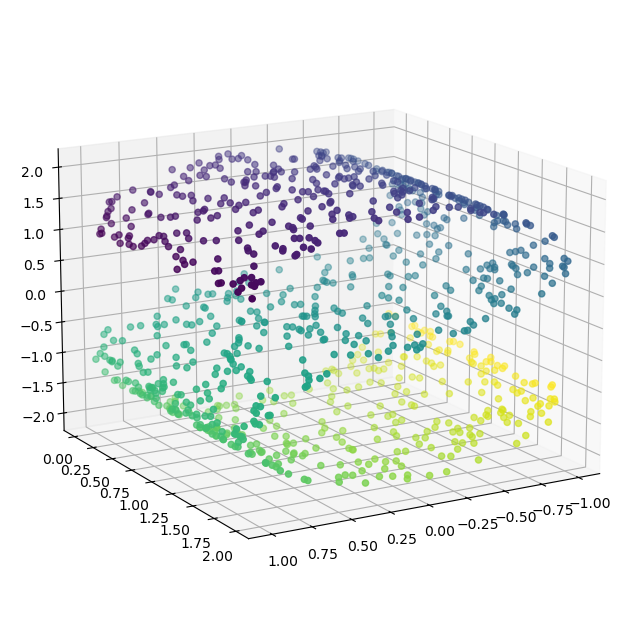

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)

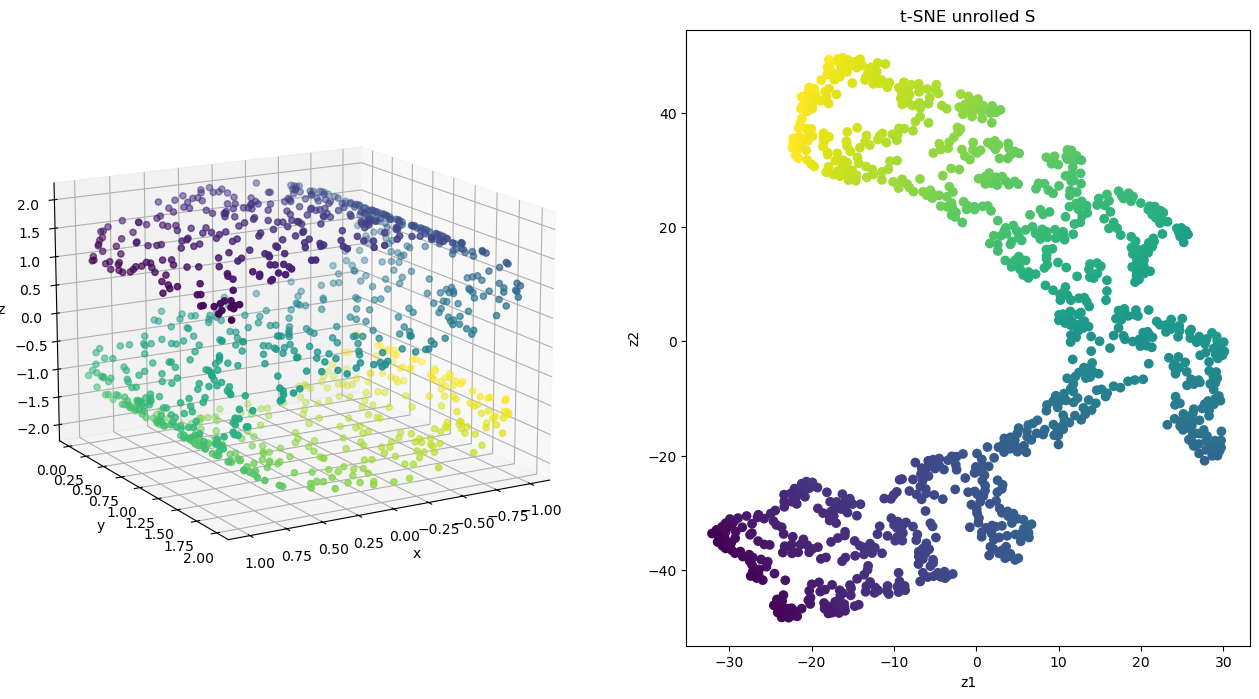

In [3]:
from sklearn.manifold import TSNE

n_components = 2

tSNE = TSNE(n_components=n_components, #number of dimensions
            perplexity=30, #dictates the neighborhood size (default 30)
            early_exaggeration=12, #factor that multiplies our p matrix which and defines the cluster separation
            learning_rate=200, # Remember:
                               # too small, suboptimal solution/local minima,
                               # too large doesn't move towards optimal solution
            n_iter=1000,
            n_iter_without_progress=300,
            min_grad_norm=1e-7, # if gradient norm gets too slow learning stops
            metric='euclidean', # distance metric, can use either custom precomputed or any from here:
                                # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html
            init='random', # (n_samples, n_components), 'random', 'pca', or custom through numpy array
            verbose=0,
            random_state=0, # try different random states, find loss KL loss
            method='barnes_hut', # 'exact' (default: barnes_hut)
            angle=0.5, # When points are separated by less than this angular distance consider all points within
                       # this angle represented by 1 point. Larger -> more speed, lower performance
            n_jobs=2
           )
# equal to number of datapoints
data_transf = tSNE.fit_transform(data)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(122)
ax.scatter(x=data_transf[:,0],y=data_transf[:,1],c=color)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title(f't-SNE unrolled S')
plt.show()

#result:
#more represented on more local structure

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]

    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [ ]:
numToPlot=1000
n_components = 2

fig = plt.figure(figsize=(8,8))

tSNE = TSNE(n_components=n_components)

#you have to apply a fit_transform to t-sne every time you use it
#because there is no transform method for it for different data points later on
X_train_transf = tSNE.fit_transform(X_train.iloc[:numToPlot])

plt.scatter(X_train_transf[:numToPlot, 0], X_train_transf[:numToPlot, 1], c=y_train.astype(int).iloc[:numToPlot])
plt.title(f't-SNE 2 components transformed MNIST data')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.show()

#result:
#t-sne found a good separation between our different classes

/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

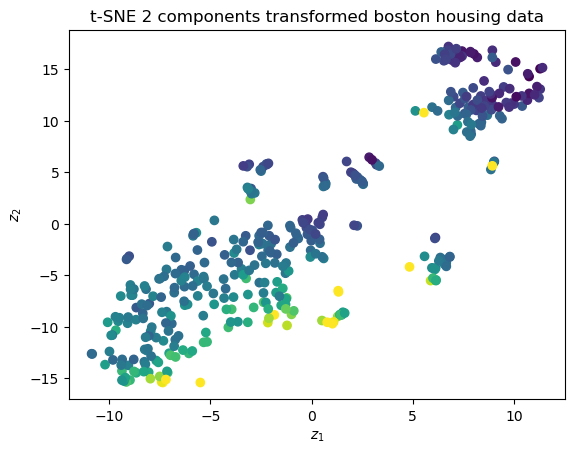

In [4]:
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_boston()

X, y = data["data"], data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#compared to mnnist: mnist has a consistent scale across all different features but
#for the boston housing dataset we need a scaler like the StandardScaler
pipe = Pipeline([('std_scl',StandardScaler()),#std scaler before tSNE
                 ('t-SNE',TSNE(n_components=2,perplexity=60))
                ])

X_train_transf = pipe.fit_transform(X_train)
plt.scatter(X_train_transf[:, 0], X_train_transf[:, 1], c=y_train)
plt.title(f't-SNE 2 components transformed boston housing data')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.show()

----------

**Website from the t-SNE Algorithm:**
- you can play around with different visualizations (using the variables there)
- https://distill.pub/2016/misread-tsne/